# Область работы 1 (библиотеки)

In [40]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.api import abline_plot
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Область работы 2 (выбор модели)

In [42]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv'# содержит только имя файла, без имен папок !!!

In [43]:
df = pd.read_csv(path_train)
df.head()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408


In [44]:
len(df) - len(df.drop_duplicates())

0

In [45]:
X = df.drop(columns=['price'])
y = df['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
# Инициализация модели GradientBoostingRegressor
#gradient_boosting = GradientBoostingRegressor(n_estimators=1000, subsample=0.7)
gradient_boosting = RandomForestRegressor()

# Обучение модели
gradient_boosting.fit(X_train, y_train)

# Предсказание на обучающем и тестовом наборах
y_pred_train = gradient_boosting.predict(X_train)
y_pred = gradient_boosting.predict(X_test)

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
    print("MAPE Error:", "{:,.2f}".format(mape*100))

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

# Визуализация результатов регрессии
#plot_2_error(y_train, y_pred_train)
#plot_2_error(y_test, y_pred)

In [48]:
rng = np.random.RandomState(42)

noise = rng.normal(size=(len(X), 50))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([X, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, y, random_state=42, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select_pct = SelectPercentile(percentile=30)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (204, 79)
форма массива X_train_selected: (204, 24)


C:\Users\malsh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\malsh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


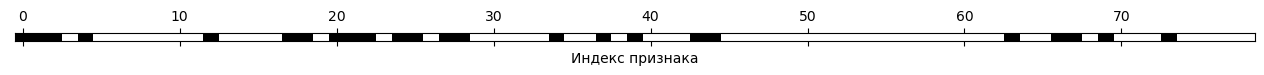

In [49]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

In [50]:
selected_features = select_pct.get_support()[:29]
print("Отобранные признаки:", X.columns[selected_features].tolist())

Отобранные признаки: ['0', '1', '2', '4', '12', '17', '18', '20', '21', '22', '24', '25', '27', '28']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
rfe_select = RFE(LinearRegression())

rfe_select.fit(X_train, y_train)
mask = rfe_select.get_support()
rfe_select.get_feature_names_out()

array(['0', '2', '3', '4', '6', '12', '15', '17', '20', '21', '22', '24',
       '25', '27'], dtype=object)

In [52]:
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
mask = select_pct.get_support()
select_pct.get_feature_names_out()

C:\Users\malsh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\malsh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array(['0', '2', '3', '4', '12', '16', '18', '19', '20', '21', '22', '24',
       '25', '27'], dtype=object)

In [53]:
kbest = SelectKBest(f_regression, k=14)
kbest.fit(X_train, y_train)
features = kbest.get_support()
kbest.get_feature_names_out()

array(['0', '2', '3', '4', '5', '12', '18', '19', '20', '21', '22', '24',
       '25', '27'], dtype=object)

In [54]:
kbest = SelectKBest(f_regression, k=10)
kbest.fit(X_train, y_train)
features = kbest.get_support()
kbest.get_feature_names_out()

array(['2', '12', '18', '19', '20', '21', '22', '24', '25', '27'],
      dtype=object)

In [55]:
columns = ['0', '2', '4', '12', '17', '18', '19', '20', '21', '22', '24',
       '25', '27']

#columns = ['2', '12', '18', '19', '20', '21', '22', '24', '25', '27']

In [56]:
X = X.loc[:, columns]
X_train_sel = X_train.loc[:, columns]
X_test_sel = X_test.loc[:, columns]

In [57]:
scores = cross_val_score(GradientBoostingRegressor(), X, y, cv=KFold(n_splits=5, shuffle=True),
scoring='neg_mean_absolute_percentage_error')
display(scores)
display(np.mean(scores))
display(np.std(scores))

array([-0.18934694, -0.1982598 , -0.19845193, -0.20591853, -0.1636762 ])

-0.1911306824783156

0.01469718339469195

In [58]:
def plot_2_error(y_true, y_pred):
    
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Scatter Plot')
    plt.title('Scatter Plot of Predicted vs. True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    
   
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Prediction Line')
    
    
    plt.legend()
    print(f'MAPE: {mape:.2f}%')
    
    
    plt.show()

MAPE: 16.94%


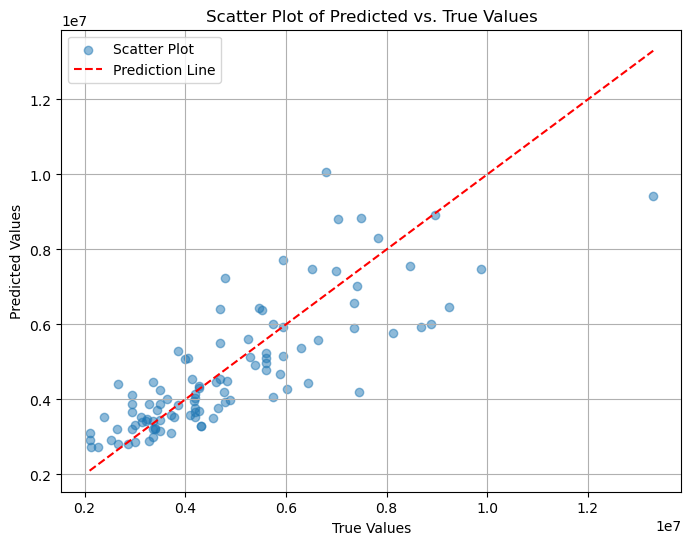

In [59]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model.fit(X_train_sel, y_train)
plot_2_error(y_test, model.predict(X_test_sel))

In [60]:
param_grid = [
    # SVR
    {
        'model__regressor__estimator': [SVR()],
        'model__regressor__estimator__kernel': ['rbf'],
        'model__regressor__estimator__C': [100],
        'model__regressor__estimator__epsilon': [0.01],
        'model__regressor__estimator__gamma': ['scale'],
        'model__transformer': [PowerTransformer(method='yeo-johnson')]
    },
    # RandomForestRegressor
    {
        'model__regressor__estimator': [RandomForestRegressor()],
        'model__regressor__estimator__max_depth': [None, 10, 20, 30],
        'model__regressor__estimator__min_samples_split': [2, 5, 10],
        'model__regressor__estimator__min_samples_leaf': [1, 2, 4],
        'model__transformer': [PowerTransformer(method='yeo-johnson')]
    },
    # GradientBoostingRegressor
    {
        'model__regressor__estimator': [GradientBoostingRegressor()],
        'model__regressor__estimator__learning_rate': [0.01, 0.1, 0.2],
        'model__regressor__estimator__max_depth': [3, 5, 7],
        'model__regressor__estimator__min_samples_split': [2, 5, 10],
        'model__regressor__estimator__min_samples_leaf': [1, 2, 4],
        'model__transformer': [PowerTransformer(method='yeo-johnson')]
    },
    # LinearRegression
    {
        'model__regressor__estimator': [LinearRegression()],
        'model__regressor__estimator__fit_intercept': [True, False],
        'model__transformer': [PowerTransformer(method='yeo-johnson')]
    }
]


scores = 'neg_mean_absolute_percentage_error'
grid_2 = GridSearchCV(model, n_jobs=-1, param_grid=param_grid, scoring=scores)

grid_2.fit(X_train_sel, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('estimator',
                                                                                              Ridge())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{'model__regressor__estimator': [SVR()],
                          'model__regressor__estimator__C': [100],
                          'model__regressor__estimator__epsilon': [0.01],
                          'model__regressor__estim...
                          'model__regressor__estimator__min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                          'model__regressor__estimator__min_samples_split': [2,
                                                                             5,
                                                                             10],
                          'model__transformer': [PowerTransformer()]},
                         {'model__regressor__estimator': [LinearRegression()],
                          'model__regressor__estimator__fit_intercept': [True,
                                                                         False],
                          'model__transformer': [PowerTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [61]:
grid_result = pd.DataFrame(grid_2.cv_results_).sort_values(by=['rank_test_score', 'std_test_score']).T
grid_result

,119,118,17,7,16,33,24,25,18,35,...,103,55,112,101,83,113,82,110,109,0
mean_fit_time,0.017144,0.017285,0.441176,0.440871,0.414019,0.440534,0.435233,0.423552,0.445302,0.420049,...,0.281453,0.506785,0.370553,0.296843,0.372181,0.36409,0.406874,0.352584,0.375719,0.109136
std_fit_time,0.004967,0.002902,0.03611,0.045045,0.007519,0.02216,0.017275,0.015835,0.009728,0.017535,...,0.004001,0.05352,0.036929,0.015617,0.016217,0.035695,0.016133,0.008632,0.004,0.031333
mean_score_time,0.00223,0.004025,0.015434,0.014329,0.016097,0.014682,0.013299,0.017359,0.014954,0.01539,...,0.001614,0.00663,0.005315,0.005795,0.004041,0.005285,0.002913,0.001227,0.009688,0.008775
std_score_time,0.001444,0.00421,0.004184,0.002859,0.004656,0.002348,0.003237,0.003743,0.004337,0.003582,...,0.003227,0.003816,0.00271,0.006999,0.004232,0.001985,0.00386,0.001002,0.00082,0.003327
param_model__regressor__estimator,LinearRegression(),LinearRegression(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor(),...,GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),SVR()
param_model__regressor__estimator__C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
param_model__regressor__estimator__epsilon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
param_model__regressor__estimator__gamma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scale
param_model__regressor__estimator__kernel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rbf
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer()


In [62]:
grid_2.best_params_

{'model__regressor__estimator': LinearRegression(),
 'model__regressor__estimator__fit_intercept': False,
 'model__transformer': PowerTransformer()}

In [63]:
scores = cross_val_score(Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', LinearRegression(fit_intercept=False))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )]), X, y, cv=KFold(n_splits=5, shuffle=True),
scoring='neg_mean_absolute_percentage_error')
display(scores)
display(np.mean(scores))
display(np.std(scores))

array([-0.15442903, -0.17994889, -0.16830651, -0.20254585, -0.18614307])

-0.17827467068794095

0.016259051258644453

## Ridge

In [64]:
model_r = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])


param_grid = [
    {
    'model__regressor__estimator__alpha': [0, 0.2, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2],
    'model__regressor__estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'model__transformer': [PowerTransformer(), QuantileTransformer()],
    }]


grid = GridSearchCV(model_r, param_grid, scoring = 'neg_mean_absolute_percentage_error', n_jobs=-1)
grid.fit(X_train_sel, y_train)
grid

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('estimator',
                                                                                              Ridge())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{'model__regressor__estimator__alpha': [0, 0.2, 0.8, 1,
                                                                 1.2, 1.4, 1.6,
                                                                 1.8, 2, 2.2],
                          'model__regressor__estimator__solver': ['auto', 'svd',
                                                                  'cholesky',
                                                                  'lsqr',
                                                                  'sparse_cg',
                                                                  'sag',
                                                                  'saga'],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [65]:
grid_result_ridge = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_ridge

,138,124,110,54,68,82,96,132,136,104,...,119,99,103,101,111,107,113,117,115,121
mean_fit_time,0.023426,0.028053,0.030206,0.024057,0.024073,0.02381,0.027266,0.019433,0.021177,0.020384,...,0.014346,0.016802,0.010433,0.015155,0.019681,0.02726,0.015134,0.009438,0.016746,0.013662
std_fit_time,0.003939,0.002693,0.007631,0.002836,0.002206,0.003259,0.002292,0.003828,0.005775,0.003348,...,0.002535,0.010094,0.00293,0.006428,0.006875,0.012086,0.006244,0.003411,0.002126,0.007589
mean_score_time,0.004847,0.003079,0.004608,0.003267,0.004999,0.001763,0.002559,0.006338,0.005654,0.004081,...,0.007257,0.00403,0.008839,0.00573,0.00487,0.003608,0.001109,0.006226,0.00589,0.004295
std_score_time,0.004336,0.002998,0.005115,0.003288,0.0022,0.003526,0.003181,0.002983,0.004677,0.003228,...,0.004446,0.004224,0.000971,0.003148,0.003479,0.004466,0.002217,0.003441,0.008048,0.003412
param_model__regressor__estimator__alpha,2.2,2,1.8,1,1.2,1.4,1.6,2.2,2.2,1.8,...,2,1.8,1.8,1.8,1.8,1.8,2,2,2,2
param_model__regressor__estimator__solver,saga,saga,saga,saga,saga,saga,saga,lsqr,sag,lsqr,...,lsqr,auto,cholesky,svd,saga,sparse_cg,auto,cholesky,svd,sparse_cg
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer()
params,"{'model__regressor__estimator__alpha': 2.2, 'm...","{'model__regressor__estimator__alpha': 2, 'mod...","{'model__regressor__estimator__alpha': 1.8, 'm...","{'model__regressor__estimator__alpha': 1, 'mod...","{'model__regressor__estimator__alpha': 1.2, 'm...","{'model__regressor__estimator__alpha': 1.4, 'm...","{'model__regressor__estimator__alpha': 1.6, 'm...","{'model__regressor__estimator__alpha': 2.2, 'm...","{'model__regressor__estimator__alpha': 2.2, 'm...","{'model__regressor__estimator__alpha': 1.8, 'm...",...,"{'model__regressor__estimator__alpha': 2, 'mod...","{'model__regressor__estimator__alpha': 1.8, 'm...","{'model__regressor__estimator__alpha': 1.8, 'm...","{'model__regressor__estimator__alpha': 1.8, 'm...","{'model__regressor__estimator__alpha': 1.8, 'm...","{'model__regressor__estimator__alpha': 1.8, 'm...","{'model__regressor__estimator__alpha': 2, 'mod...","{'model__regressor__estimator__alpha': 2, 'mod...","{'model__regressor__estimator__alpha': 2, 'mod...","{'model__regressor__estimator__alpha': 2, 'mod..."
split0_test_score,-0.223801,-0.223778,-0.223752,-0.223648,-0.223675,-0.223699,-0.223726,-0.223839,-0.223819,-0.223779,...,-0.247325,-0.247288,-0.247288,-0.247288,-0.247277,-0.247293,-0.24733,-0.24733,-0.24733,-0.247335
split1_test_score,-0.19631,-0.196334,-0.196331,-0.196341,-0.196349,-0.196344,-0.196346,-0.196328,-0.196328,-0.196339,...,-0.201462,-0.2015,-0.2015,-0.2015,-0.201475,-0.201498,-0.201471,-0.201471,-0.201471,-0.20147


In [66]:
grid.best_estimator_.fit(X_train_sel, y_train)
y_pred = grid.best_estimator_.predict(X_test_sel)
mean_absolute_percentage_error(y_pred, y_test)

0.1701733659431298

In [67]:
grid.best_params_

{'model__regressor__estimator__alpha': 2.2,
 'model__regressor__estimator__solver': 'saga',
 'model__transformer': PowerTransformer()}

## Forest

In [68]:
model_f = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', RandomForestRegressor())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

param_grid = {
    'model__regressor__estimator__n_estimators': [20],
    'model__regressor__estimator__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__regressor__estimator__max_depth': [None, 4, 8, 10],
    'model__regressor__estimator__min_samples_split': [3, 9, 10],
    'model__regressor__estimator__min_samples_leaf': [1, 2, 4, 6],
    'model__transformer': [PowerTransformer()] 
}


grid_t = GridSearchCV(model_f, param_grid, n_jobs = -1, scoring = 'neg_mean_absolute_percentage_error')
grid_t.fit(X_train_sel, y_train)
grid_t
grid_result = pd.DataFrame(grid_t.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

C:\Users\malsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\malsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\malsh\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\malsh\anaconda3\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\User

,57,88,95,55,59,54,90,78,52,83,...,182,183,184,185,186,187,188,189,190,191
mean_fit_time,0.188014,0.240408,0.189841,0.208997,0.192848,0.211705,0.218674,0.215049,0.254671,0.18902,...,0.018752,0.012502,0.015626,0.012501,0.014189,0.010586,0.012509,0.012506,0.018768,0.015628
std_fit_time,0.003528,0.009477,0.002575,0.009485,0.004863,0.004305,0.015256,0.010008,0.012609,0.011282,...,0.006251,0.006251,0.000001,0.006251,0.007026,0.006473,0.006255,0.006253,0.006251,0.0
mean_score_time,0.007123,0.007306,0.004451,0.005237,0.006987,0.008601,0.004643,0.00758,0.008268,0.003238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.003726,0.001053,0.003914,0.004327,0.00267,0.00273,0.00322,0.002161,0.00282,0.003517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_model__regressor__estimator__criterion,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,...,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson
param_model__regressor__estimator__max_depth,None,10,10,None,None,None,10,8,None,8,...,10,10,10,10,10,10,10,10,10,10
param_model__regressor__estimator__min_samples_leaf,6,2,6,4,6,4,4,4,2,6,...,1,2,2,2,4,4,4,6,6,6
param_model__regressor__estimator__min_samples_split,3,9,10,9,10,3,3,3,9,10,...,10,3,9,10,3,9,10,3,9,10
param_model__regressor__estimator__n_estimators,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer()


In [69]:
grid_result_t = pd.DataFrame(grid_t.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_t

,57,88,95,55,59,54,90,78,52,83,...,182,183,184,185,186,187,188,189,190,191
mean_fit_time,0.188014,0.240408,0.189841,0.208997,0.192848,0.211705,0.218674,0.215049,0.254671,0.18902,...,0.018752,0.012502,0.015626,0.012501,0.014189,0.010586,0.012509,0.012506,0.018768,0.015628
std_fit_time,0.003528,0.009477,0.002575,0.009485,0.004863,0.004305,0.015256,0.010008,0.012609,0.011282,...,0.006251,0.006251,0.000001,0.006251,0.007026,0.006473,0.006255,0.006253,0.006251,0.0
mean_score_time,0.007123,0.007306,0.004451,0.005237,0.006987,0.008601,0.004643,0.00758,0.008268,0.003238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.003726,0.001053,0.003914,0.004327,0.00267,0.00273,0.00322,0.002161,0.00282,0.003517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_model__regressor__estimator__criterion,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,...,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson,poisson
param_model__regressor__estimator__max_depth,None,10,10,None,None,None,10,8,None,8,...,10,10,10,10,10,10,10,10,10,10
param_model__regressor__estimator__min_samples_leaf,6,2,6,4,6,4,4,4,2,6,...,1,2,2,2,4,4,4,6,6,6
param_model__regressor__estimator__min_samples_split,3,9,10,9,10,3,3,3,9,10,...,10,3,9,10,3,9,10,3,9,10
param_model__regressor__estimator__n_estimators,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer()


In [70]:
grid_t.best_estimator_.fit(X_train_sel, y_train)
y_pred = grid_t.best_estimator_.predict(X_test_sel)
mean_absolute_percentage_error(y_pred, y_test)

0.18344427535348143

In [71]:
grid_t.best_params_

{'model__regressor__estimator__criterion': 'absolute_error',
 'model__regressor__estimator__max_depth': None,
 'model__regressor__estimator__min_samples_leaf': 6,
 'model__regressor__estimator__min_samples_split': 3,
 'model__regressor__estimator__n_estimators': 20,
 'model__transformer': PowerTransformer()}

## Linear

In [72]:
linear_model = Pipeline([
    ('model', TransformedTargetRegressor(
        regressor=Pipeline(steps=[
            ('estimator', LinearRegression())
        ]),
        transformer=PowerTransformer(),
        check_inverse=False)
    )
])

linear_param_grid = [
    {
        'model__regressor__estimator__fit_intercept': [True, False],
        'model__transformer': [PowerTransformer(), QuantileTransformer()],
    }
]

linear_grid = GridSearchCV(linear_model, linear_param_grid, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
linear_grid.fit(X_train_sel, y_train)
linear_grid

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('estimator',
                                                                                              LinearRegression())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid=[{'model__regressor__estimator__fit_intercept': [True,
                                                                         False],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [73]:
grid_result_l = pd.DataFrame(linear_grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_l

,2,0,1,3
mean_fit_time,0.026954,0.020257,0.040813,0.026439
std_fit_time,0.007072,0.006223,0.017659,0.002674
mean_score_time,0.004848,0.001505,0.005304,0.005208
std_score_time,0.003143,0.003011,0.00433,0.004315
param_model__regressor__estimator__fit_intercept,False,True,True,False
param_model__transformer,PowerTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer()
params,{'model__regressor__estimator__fit_intercept':...,{'model__regressor__estimator__fit_intercept':...,{'model__regressor__estimator__fit_intercept':...,{'model__regressor__estimator__fit_intercept':...
split0_test_score,-0.224065,-0.223548,-0.246683,-0.457113
split1_test_score,-0.196523,-0.196401,-0.201617,-0.483264
split2_test_score,-0.165191,-0.165024,-0.170016,-0.470669


In [74]:
linear_grid.best_estimator_.fit(X_train_sel, y_train)
y_pred = linear_grid.best_estimator_.predict(X_test_sel)
mean_absolute_percentage_error(y_pred, y_test)

0.17306483532886122

In [75]:
linear_grid.best_params_

{'model__regressor__estimator__fit_intercept': False,
 'model__transformer': PowerTransformer()}

In [76]:
eclf = VotingRegressor(
estimators=[('ridge', model_r), ('for', model_f), ('lin', linear_model)])

for clf, label in zip([model_r, model_f, linear_model, eclf], ['ridge', 'forest',
'linear', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True))
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1: -0.18 (+/- 0.01) [ridge]
F1: -0.19 (+/- 0.02) [forest]
F1: -0.18 (+/- 0.01) [linear]
F1: -0.18 (+/- 0.01) [Ensemble]


In [77]:
eclf.fit(X_train_sel, y_train)
y_pred = eclf.predict(X_test_sel)
mean_absolute_percentage_error(y_pred, y_test)

0.16681054192676406

In [78]:
scores = cross_val_score(Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', VotingRegressor(estimators=[('ridge', model_r), ('for', model_f), ('lin', linear_model)]))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )]), X, y, cv=KFold(n_splits=5, shuffle=True),
scoring='neg_mean_absolute_percentage_error')
display(scores)
display(np.mean(scores))
display(np.std(scores))

array([-0.16705063, -0.17026577, -0.20658411, -0.19505449, -0.16996655])

-0.18178431068739212

0.01600340475077948